### Problem Statement:

**Context**:
The Gurugram-based FlipItNews aims to revolutionize the way Indians perceive finance, business, and capital market investment, by giving it a boost through artificial intelligence (AI) and machine learning (ML). They’re on a mission to reinvent financial literacy for Indians, where financial awareness is driven by smart information discovery and engagement with peers. Through their smart content discovery and contextual engagement, the company is simplifying business, finance, and investment for millennials and first-time investors

**Objective**:
The goal of this project is to use a bunch of news articles extracted from the companies’ internal database and categorize them into several categories like politics, technology, sports, business and entertainment based on their content. Use natural language processing and create & compare at least three different models.

### Attribute Information:

* Article
* Category

The feature names are themselves pretty self-explanatory.

### Our Approach:

1. Importing the libraries
2. Loading the dataset
  * Mounting the drive
  * Reading the data file
3. Data Exploration
  * Shape of the dataset
  * News articles per category
4. Text Processing
  * Removing the non-letters
  * Tokenizing the text
  * Removing stopwords
  * Lemmatization
5. Data Transformation
  * Encoding the target variable
  * Bag of Words
  * TF-IDF
  * Train-Test Split
6. Model Training & Evaluation
  * Simple Approach
    * Naive Bayes
  * Functionalized Code
    * Decision Tree
    * Nearest Neighbors
    * Random Forest

In [2]:
# To ignore all warnings
import warnings

# For reading & manipulating the data
import pandas as pd
import numpy as np

# For visualizing the data
!pip install matplotlib --upgrade
import matplotlib.pyplot as plt
import seaborn as sns

# To use Regular Expressions
import re

# To use Natural Language Processing
import nltk

# For tokenization
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# To remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

# For lemmetization
from nltk import WordNetLemmatizer
nltk.download('wordnet')

# For BoW & TF-IDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# For encoding the categorical variable
!pip install category_encoders
import category_encoders as ce

# To try out different ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# To perform train-test split
from sklearn.model_selection import train_test_split

# Performace Metrics for evaluating the model
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

warnings.simplefilter('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 34.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.0
    Uninstalling matplotlib-3.8.0:
      Successfully uninstalled matplotlib-3.8.0


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.7 MB/s eta 0:00:00


In [4]:
df = pd.read_csv('flipitnews-data.csv')
df.sample(10)

,Category,Article
158,Politics,uk firms embracing e-commerce uk firms are e...
1418,Politics,clarke faces id cards rebellion charles clarke...
495,Politics,thousands join strike in wales thousands of ci...
313,Technology,speech takes on search engines a scottish firm...
740,Technology,spam e-mails tempt net shoppers computer users...
1361,Business,executive trio leave aer lingus three senior e...
617,Technology,rivals of the £400 apple... the mac mini is th...
890,Sports,wales win in rome wales secured their first aw...
689,Entertainment,vera drake scoops film award oscar hopefuls mi...
1097,Technology,ask jeeves joins web log market ask jeeves has...


In [6]:
print("no. of rows: ", df.shape[0])

no. of rows:  2225


[Text(0, 0, '401')]

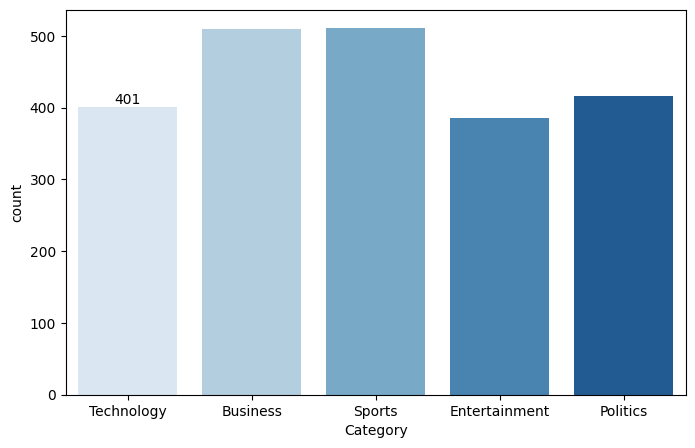

In [7]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Category', data=df, palette='Blues')
ax.bar_label(ax.containers[0])

In [8]:
df['Article'][1]

'worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  never made accounting decisions  a witness has told jurors.  david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems. the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares. mr myers has already pleaded guilty to fraud and is assisting prosecutors.  on monday  defence lawyer reid weingarten tried to distance his client from the allegations. during cross examination  he asked mr myers if he ever knew mr ebbers  make an accounting decision  .  not that i am aware of   mr myers replied.  did you ever know mr ebbers to make an accounting entry into worldcom books   mr weingarten pressed.  no   replied the witness. mr myers has admitted that he ordered false accounting entries at the request of former worldcom chief financi

In [9]:
encode = ce.OrdinalEncoder(cols=['Category'])
df = encode.fit_transform(df)

In [10]:
df.sample(10)

,Category,Article
1636,3,iaaf to rule on greek sprint pair greek sprint...
468,5,guantanamo four free in weeks all four britons...
1597,2,survey confirms property slowdown government f...
2180,3,campbell lifts lid on united feud arsenal s so...
498,2,g7 backs africa debt relief plan g7 finance mi...
312,4,incredibles win animation awards the incredibl...
1559,4,us actor ossie davis found dead us actor ossie...
800,1,more women turn to net security older people a...
1565,3,ferdinand casts doubt over glazer rio ferdinan...
1145,3,harinordoquy suffers france axe number eight i...


# Let's start with TF-IDF

In [11]:
tf_idf = TfidfVectorizer()

X = tf_idf.fit_transform(df['Article']).toarray()
y = np.array(df['Category'].values)

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, shuffle=True, stratify=y)

In [13]:
print("No  of rows in train:" , X_train.shape[0])
print("No  of rows in validation:" , X_val.shape[0])

No  of rows in train: 1668
No  of rows in validation: 557


In [16]:
X_train[:5]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02816798, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [19]:
np.unique(X_train[0], return_counts=True)

(array([0.        , 0.01008252, 0.01041102, 0.0107031 , 0.0111089 ,
        0.0119782 , 0.01205919, 0.01223541, 0.01272405, 0.01291482,
        0.01376654, 0.01430226, 0.01437072, 0.01448605, 0.01515431,
        0.01556628, 0.01636824, 0.01672366, 0.0169588 , 0.01714749,
        0.01719   , 0.01861359, 0.01894779, 0.01904007, 0.0195237 ,
        0.01953119, 0.01988982, 0.02003764, 0.02006751, 0.02065613,
        0.02075293, 0.02127146, 0.02227766, 0.02247418, 0.02253404,
        0.02289631, 0.02313556, 0.02341972, 0.02458568, 0.0247099 ,
        0.0252212 , 0.02527637, 0.02544409, 0.02548587, 0.02608915,
        0.02627394, 0.02702222, 0.02751234, 0.02765774, 0.02776845,
        0.02818726, 0.02822638, 0.02834484, 0.0285054 , 0.02935733,
        0.02944744, 0.02949285, 0.02958441, 0.02963057, 0.02972364,
        0.0298652 , 0.0299609 , 0.03010874, 0.03012357, 0.03035896,
        0.03038602, 0.03045634, 0.03103703, 0.03125847, 0.03148586,
        0.03149277, 0.03154367, 0.03160188, 0.03

## Simple approaches

### Multinomial Naive Bayes

In [14]:
nb = MultinomialNB()

nb.fit(X_train, y_train)

MultinomialNB()

In [15]:
nb_train = accuracy_score(y_train, nb.predict(X_train))
nb_test = accuracy_score(y_val, nb.predict(X_val))

print("Train Accuracy: ", nb_train)
print("Test Accuracy: ", nb_test)

Train Accuracy:  0.9838129496402878
Test Accuracy:  0.9245960502692998


In [22]:
y_pred_nb = nb.predict(X_val)
y_pred_proba_nb = nb.predict_proba(X_val)

roc_auc_score(y_val, y_pred_proba_nb, multi_class='ovr')

0.9976273767151996

In [23]:
precision = precision_score(y_val, y_pred_nb, average='weighted')
recall = recall_score(y_val, y_pred_nb, average='weighted')
f1 = f1_score(y_val, y_pred_nb, average='weighted')

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

Precision:  0.9295568430764746
Recall:  0.9245960502692998
F1 Score:  0.9232293754442108


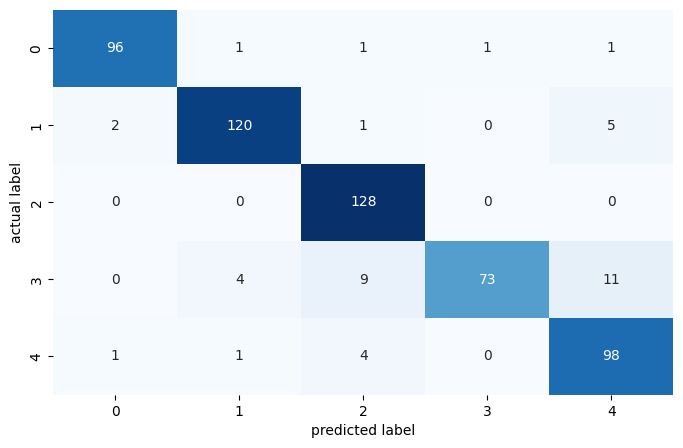

In [26]:
cm = confusion_matrix(y_val, y_pred_nb)

plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='Blues')

plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.show()

In [27]:
def model_train(obj):
  obj.fit(X_train, y_train) # Training the model
  y_pred = obj.predict(X_val) # Making predictions
  y_pred_proba = obj.predict_proba(X_val)
  return y_pred, y_pred_proba


def model_eval(obj, y_pred, y_pred_proba):
    print("-------------------------")

    # Calculating the train & test accuracy
    train_acc = accuracy_score(y_train, obj.predict(X_train))
    test_acc = accuracy_score(y_val, obj.predict(X_val))

    print("Train Accuracy: {:.3f}".format(train_acc))
    print("Test Accuracy: {:.3f}\n".format(test_acc))

    # Computing the ROC AUC score
    print("ROC AUC Score: {:.3f}\n".format(roc_auc_score(y_val, y_pred_proba, multi_class='ovr')))

    # Computing the precision, recall & f1 score
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')

    print("Precision: {:.3f}".format(precision))
    print("Recall: {:.3f}".format(recall))
    print("F1 Score: {:.3f}".format(f1))

    print("-------------------------")

### Decision Tree

In [30]:
dt = DecisionTreeClassifier()

y_pred_dt, y_pred_proba_dt = model_train(dt)

model_eval(dt, y_pred_dt, y_pred_proba_dt)

-------------------------
Train Accuracy: 1.000
Test Accuracy: 0.790

ROC AUC Score: 0.867

Precision: 0.789
Recall: 0.790
F1 Score: 0.789
-------------------------


In [31]:
rf = RandomForestClassifier()

y_pred_rf, y_pred_proba_rf = model_train(rf)

model_eval(rf, y_pred_rf, y_pred_proba_rf)

-------------------------
Train Accuracy: 1.000
Test Accuracy: 0.944

ROC AUC Score: 0.995

Precision: 0.945
Recall: 0.944
F1 Score: 0.944
-------------------------


# Let's start with BOW

In [32]:
cv = CountVectorizer(max_features = 5000)

X = cv.fit_transform(df['Article']).toarray()
y = np.array(df['Category'].values)


In [33]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, shuffle=True, stratify=y)

### Multinomial NB

In [34]:
nb = MultinomialNB()

nb.fit(X_train, y_train)

MultinomialNB()

In [35]:
nb_train = accuracy_score(y_train, nb.predict(X_train))
nb_test = accuracy_score(y_val, nb.predict(X_val))

print("Train accuracy: ", nb_train)
print("Test Accuracy: ", nb_test)

Train accuracy:  0.9910071942446043
Test Accuracy:  0.9658886894075404


In [36]:
dt = DecisionTreeClassifier()

y_pred_dt, y_pred_proba_dt = model_train(dt)

model_eval(dt, y_pred_dt, y_pred_proba_dt)

-------------------------
Train Accuracy: 1.000
Test Accuracy: 0.794

ROC AUC Score: 0.869

Precision: 0.796
Recall: 0.794
F1 Score: 0.794
-------------------------


In [37]:
# Random Forest

rf = RandomForestClassifier()

y_pred_rf, y_pred_proba_rf = model_train(rf)

model_eval(rf, y_pred_rf, y_pred_proba_rf)

-------------------------
Train Accuracy: 1.000
Test Accuracy: 0.959

ROC AUC Score: 0.997

Precision: 0.959
Recall: 0.959
F1 Score: 0.959
-------------------------


# LSTM

In [38]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, GRU, SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



df = pd.read_csv('flipitnews-data.csv')
df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


In [40]:
max_features = 5000
maxlen = 100
# N X 1200 * 512, N x 100 * 512
embedding_size = 100
batch_size = 500
epochs = 10




1. no way you're idiot
2. no way, you're idiot

In [42]:
def preprocess_text(df, text_column):
  df[text_column] = df[text_column].apply(lambda x: x.lower())
  return df

df = preprocess_text(df, 'Article')

In [43]:
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(df['Article'])

sequences = tokenizer.texts_to_sequences(df['Article'])
data = pad_sequences(sequences, maxlen = maxlen)

In [44]:
le = LabelEncoder()

labels = le.fit_transform(df['Category'])
labels = tf.keras.utils.to_categorical(labels)

In [45]:
labels

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [57]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state=42)


In [50]:
def load_glove_embeddings(embedding_path, embedding_dim, tokenizer, max_features):

  embeddings_index = {}

  with open(embedding_path, 'r', encoding='utf8') as f:
    for line in f:
      values = line.split()
      word = values[0]
      coefs = np.asarray(values[1:], dtype='float32')
      embeddings_index[word] = coefs


  limited_word_index = {word:index for word, index, in tokenizer.word_index.items() if index < max_features}

  embedding_matrix =  np.zeros((min(max_features + 1, len(limited_word_index) + 1), embedding_dim))


  for word, i in limited_word_index.items():
    if i > max_features:
      continue

    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

  return embedding_matrix

In [53]:
embedding_matrix = load_glove_embeddings('glove.6B.100d.txt', embedding_size, tokenizer, max_features)


In [54]:
model = Sequential([
    Embedding(max_features, embedding_size, weights=[embedding_matrix],
              input_length=maxlen, trainable=False),
    LSTM(100),
    Dense(len(np.unique(df['Category'])), activation='softmax')

])

In [55]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [58]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

model.fit(X_train, y_train, batch_size=batch_size, epochs = epochs, validation_data=(X_test, y_test),
          verbose=2, callbacks=[early_stopping])

Epoch 1/10
4/4 - 5s - 1s/step - accuracy: 0.2983 - loss: 1.5676 - val_accuracy: 0.3978 - val_loss: 1.4805
Epoch 2/10
4/4 - 2s - 580ms/step - accuracy: 0.4882 - loss: 1.4183 - val_accuracy: 0.5596 - val_loss: 1.3194
Epoch 3/10
4/4 - 4s - 1s/step - accuracy: 0.6191 - loss: 1.2164 - val_accuracy: 0.6494 - val_loss: 1.0577
Epoch 4/10
4/4 - 5s - 1s/step - accuracy: 0.6601 - loss: 0.9668 - val_accuracy: 0.6629 - val_loss: 0.9537
Epoch 5/10
4/4 - 2s - 589ms/step - accuracy: 0.7191 - loss: 0.8346 - val_accuracy: 0.7348 - val_loss: 0.7925
Epoch 6/10
4/4 - 2s - 616ms/step - accuracy: 0.7809 - loss: 0.6742 - val_accuracy: 0.7438 - val_loss: 0.7283
Epoch 7/10
4/4 - 3s - 731ms/step - accuracy: 0.8067 - loss: 0.5889 - val_accuracy: 0.8135 - val_loss: 0.6086
Epoch 8/10
4/4 - 9s - 2s/step - accuracy: 0.8461 - loss: 0.5021 - val_accuracy: 0.8539 - val_loss: 0.4918
Epoch 9/10
4/4 - 6s - 2s/step - accuracy: 0.8680 - loss: 0.4371 - val_accuracy: 0.8449 - val_loss: 0.4329
Epoch 10/10
4/4 - 2s - 590ms/step 

### GRU

In [59]:
## GRU


# Model building
model = Sequential([
    Embedding(max_features, embedding_size, weights=[embedding_matrix], input_length=maxlen, trainable=False),
    GRU(100),
    Dense(len(np.unique(df['Category'])), activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Use EarlyStopping

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Model training
model.fit(X_train, y_train,
batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=2,
callbacks=[early_stopping])

# Evaluate

from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_argmax = np.argmax(y_test, axis=1)

print(classification_report(y_test_argmax, y_pred))


Epoch 1/10
4/4 - 7s - 2s/step - accuracy: 0.2567 - loss: 1.5960 - val_accuracy: 0.3281 - val_loss: 1.5318
Epoch 2/10
4/4 - 4s - 938ms/step - accuracy: 0.3888 - loss: 1.4874 - val_accuracy: 0.4270 - val_loss: 1.4474
Epoch 3/10
4/4 - 3s - 736ms/step - accuracy: 0.4764 - loss: 1.3983 - val_accuracy: 0.4697 - val_loss: 1.3715
Epoch 4/10
4/4 - 4s - 971ms/step - accuracy: 0.5292 - loss: 1.3135 - val_accuracy: 0.4831 - val_loss: 1.2989
Epoch 5/10
4/4 - 7s - 2s/step - accuracy: 0.5545 - loss: 1.2305 - val_accuracy: 0.5258 - val_loss: 1.2175
Epoch 6/10
4/4 - 5s - 1s/step - accuracy: 0.5848 - loss: 1.1348 - val_accuracy: 0.5685 - val_loss: 1.1121
Epoch 7/10
4/4 - 4s - 928ms/step - accuracy: 0.6354 - loss: 1.0013 - val_accuracy: 0.5978 - val_loss: 0.9852
Epoch 8/10
4/4 - 5s - 1s/step - accuracy: 0.6663 - loss: 0.8646 - val_accuracy: 0.6719 - val_loss: 0.8654
Epoch 9/10
4/4 - 2s - 621ms/step - accuracy: 0.7320 - loss: 0.7490 - val_accuracy: 0.7056 - val_loss: 0.7838
Epoch 10/10
4/4 - 2s - 622ms/st

### SimpleRNN

In [60]:
# SimpleRNN


# Model building
model = Sequential([
    Embedding(max_features, embedding_size, weights=[embedding_matrix], input_length=maxlen, trainable=False),
    SimpleRNN(100),
    Dense(len(np.unique(df['Category'])), activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Use EarlyStopping

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Model training
model.fit(X_train, y_train,
batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=2,
callbacks=[early_stopping])

# Evaluate

from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_argmax = np.argmax(y_test, axis=1)

print(classification_report(y_test_argmax, y_pred))


Epoch 1/10
4/4 - 5s - 1s/step - accuracy: 0.2051 - loss: 1.8225 - val_accuracy: 0.1933 - val_loss: 1.7701
Epoch 2/10
4/4 - 2s - 595ms/step - accuracy: 0.2393 - loss: 1.6583 - val_accuracy: 0.2584 - val_loss: 1.6408
Epoch 3/10
4/4 - 2s - 526ms/step - accuracy: 0.3225 - loss: 1.5267 - val_accuracy: 0.3034 - val_loss: 1.5592
Epoch 4/10
4/4 - 1s - 361ms/step - accuracy: 0.3876 - loss: 1.4390 - val_accuracy: 0.3551 - val_loss: 1.4763
Epoch 5/10
4/4 - 2s - 532ms/step - accuracy: 0.4624 - loss: 1.3459 - val_accuracy: 0.4022 - val_loss: 1.4009
Epoch 6/10
4/4 - 2s - 461ms/step - accuracy: 0.5118 - loss: 1.2560 - val_accuracy: 0.4562 - val_loss: 1.3239
Epoch 7/10
4/4 - 1s - 302ms/step - accuracy: 0.5652 - loss: 1.1520 - val_accuracy: 0.5146 - val_loss: 1.2189
Epoch 8/10
4/4 - 2s - 383ms/step - accuracy: 0.6051 - loss: 1.0331 - val_accuracy: 0.5708 - val_loss: 1.1104
Epoch 9/10
4/4 - 3s - 653ms/step - accuracy: 0.6360 - loss: 0.9823 - val_accuracy: 0.5843 - val_loss: 1.0587
Epoch 10/10
4/4 - 2s -

# Inference

In [65]:
def predict_category(text, tokenizer, model, label_encoder, max_len):
  text = text.lower()

  seq = tokenizer.texts_to_sequences([text])

  padded_seq = pad_sequences(seq, maxlen = max_len)

  pred = model.predict(padded_seq)

  print("output of pred: ", pred)

  pred_label_index = np.argmax(pred,axis=1)

  pred_label = label_encoder.inverse_transform(pred_label_index)

  return pred_label[0]

In [66]:
# input_text = 'I need to create better algorithm for predicting the stock market'
input_text = 'I love playing football in big field'

predicted_category = predict_category(input_text, tokenizer, model, le, maxlen)

print("predicted category: ", predicted_category)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
output of pred:  [[0.00991938 0.03369843 0.00757944 0.9436701  0.00513265]]
predicted category:  Sports
